In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline 

In [2]:
DF = pd.read_csv('BBC.csv')
DF.head()

,categoryId,commentCount,defaultAudioLanguage,defaultLanguage,definition,description,dislikeCount,duration,favoriteCount,likeCount,projection,publishedAt,tags,title,video_Link,viewCount
0,25,0.0,ar,NaN,sd,مشاركة أحمد الطاهر من #ليبيا في #أناالشاهد عن ...,0.0,290,0,2.0,rectangular,2015-01-22T15:44:16.000Z,"Africa (Continent),أنا الشاهد,الحلقة 137,وفاء ...",أنا الشاهد: أطول جدارية في إفريقيا,https://www.youtube.com/watch?v=UvRqn5R-Buc,432
1,25,1.0,ar,NaN,hd,"ديفيد فنشر مخرج بارع, موهوب بإخراج أفلام غامضة...",0.0,288,0,19.0,rectangular,2014-11-28T12:10:00.000Z,"Film (Media Genre),Alternative,gone girl,sam a...",David Fincher سينما بديلة: مقابلة مع ديفيد فنشر,https://www.youtube.com/watch?v=i9hOn7RNl10,942
2,25,2.0,ar,NaN,sd,تواصلوا مع مقدم الحلقة محمد عبد الحميد على صفح...,NaN,3084,0,NaN,rectangular,2014-07-16T18:11:56.000Z,"نقطة حوار,محمد عبد الحميد,حماس,غزة,اسرائيل",نقطة حوار: ما حقيقة قدرات حماس القتالية؟,https://www.youtube.com/watch?v=V0qaisLdP-k,6020
3,25,0.0,ar,NaN,hd,تناقش حلقة دنيانا هذا الأسبوع انطلاق الحملة ال...,4.0,3276,0,4.0,rectangular,2014-09-27T15:19:37.000Z,"بي بي سي عربي,برامج بي بي سي عربي,دنيانا,ندى ع...",قناة بي بي سي عربي : دنيانا - حلقة (18),https://www.youtube.com/watch?v=9pkJrLq3qHk,1726
4,25,0.0,ar,NaN,sd,أين تقف تركيا من الصراع الدائر في مصر حاليا ؟\...,NaN,3090,0,NaN,rectangular,2013-07-15T17:31:53.000Z,"محمد سيف,نقطة حوار,موقف تركيا تجته مصر,مصر,ترك...",نقطة حوار: أين تقف تركيا تجاه ما يحدث في مصر ب...,https://www.youtube.com/watch?v=b3svYUneFQc,608


In [3]:
DF.dtypes

categoryId                int64
commentCount            float64
defaultAudioLanguage     object
defaultLanguage          object
definition               object
description              object
dislikeCount            float64
duration                  int64
favoriteCount             int64
likeCount               float64
projection               object
publishedAt              object
tags                     object
title                    object
video_Link               object
viewCount                 int64
dtype: object

In [4]:
DF.describe()

,categoryId,commentCount,dislikeCount,duration,favoriteCount,likeCount,viewCount
count,4337.000000,4169.000000,4017.000000,4337.000000,4337.0,4017.000000,4.337000e+03
mean,24.785797,34.910050,31.098083,1454.276458,0.0,133.063480,2.958303e+04
std,1.437505,204.832729,273.970155,1231.502876,0.0,842.566671,2.400191e+05
min,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00
25%,25.000000,0.000000,0.000000,323.000000,0.0,3.000000,5.970000e+02
50%,25.000000,1.000000,1.000000,1093.000000,0.0,10.000000,1.170000e+03
75%,25.000000,4.000000,5.000000,3088.000000,0.0,29.000000,3.163000e+03
max,28.000000,5158.000000,11270.000000,6552.000000,0.0,21502.000000,8.081246e+06


In [5]:
DF.drop('favoriteCount', axis=1, inplace=True) # it has one value only
DF.drop('projection', axis=1, inplace=True)    # it has 2 values but one take 99.8%
DF.drop('defaultAudioLanguage', axis=1, inplace=True) # one take 99%

In [6]:
DF.head()

,categoryId,commentCount,defaultLanguage,definition,description,dislikeCount,duration,likeCount,publishedAt,tags,title,video_Link,viewCount
0,25,0.0,NaN,sd,مشاركة أحمد الطاهر من #ليبيا في #أناالشاهد عن ...,0.0,290,2.0,2015-01-22T15:44:16.000Z,"Africa (Continent),أنا الشاهد,الحلقة 137,وفاء ...",أنا الشاهد: أطول جدارية في إفريقيا,https://www.youtube.com/watch?v=UvRqn5R-Buc,432
1,25,1.0,NaN,hd,"ديفيد فنشر مخرج بارع, موهوب بإخراج أفلام غامضة...",0.0,288,19.0,2014-11-28T12:10:00.000Z,"Film (Media Genre),Alternative,gone girl,sam a...",David Fincher سينما بديلة: مقابلة مع ديفيد فنشر,https://www.youtube.com/watch?v=i9hOn7RNl10,942
2,25,2.0,NaN,sd,تواصلوا مع مقدم الحلقة محمد عبد الحميد على صفح...,NaN,3084,NaN,2014-07-16T18:11:56.000Z,"نقطة حوار,محمد عبد الحميد,حماس,غزة,اسرائيل",نقطة حوار: ما حقيقة قدرات حماس القتالية؟,https://www.youtube.com/watch?v=V0qaisLdP-k,6020
3,25,0.0,NaN,hd,تناقش حلقة دنيانا هذا الأسبوع انطلاق الحملة ال...,4.0,3276,4.0,2014-09-27T15:19:37.000Z,"بي بي سي عربي,برامج بي بي سي عربي,دنيانا,ندى ع...",قناة بي بي سي عربي : دنيانا - حلقة (18),https://www.youtube.com/watch?v=9pkJrLq3qHk,1726
4,25,0.0,NaN,sd,أين تقف تركيا من الصراع الدائر في مصر حاليا ؟\...,NaN,3090,NaN,2013-07-15T17:31:53.000Z,"محمد سيف,نقطة حوار,موقف تركيا تجته مصر,مصر,ترك...",نقطة حوار: أين تقف تركيا تجاه ما يحدث في مصر ب...,https://www.youtube.com/watch?v=b3svYUneFQc,608


In [7]:
DF['publishedAt'] = pd.to_datetime(DF['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%fZ') #from Stack Overflow

In [8]:
DF['publish_year']= DF['publishedAt'].apply(lambda x: x.year)
DF['publish_month']= DF['publishedAt'].apply(lambda x: x.month)
DF['publish_day']= DF['publishedAt'].apply(lambda x: x.day)
DF['publish_week_day'] = DF['publishedAt'].apply(lambda x: x.date().strftime("%A"))
DF['publish_hour']= DF['publishedAt'].apply(lambda x: x.hour)
DF['publish_duration'] = np.where(DF['publish_hour'] >= 12, 1, 0)           # PM -> 1, AM -> 0

In [9]:
id_to_category = {
 '1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'
}

In [10]:
DF.insert(1, 'category_name', DF['categoryId'].astype(str).map(id_to_category))

In [11]:
DF['videoId'] = DF['video_Link'].apply(lambda x: x.split('?v=')[1])

In [12]:
DF.iloc[DF['viewCount'].idxmax()]['publishedAt']

Timestamp('2011-03-14 15:29:40')

In [13]:
DF.iloc[DF['viewCount'].idxmin()]['publishedAt']

Timestamp('2017-10-19 14:36:08')

In [14]:
Top_Cat = DF.groupby('category_name').count().sort_values(by = 'videoId', ascending = False)

In [15]:
Top_Cat

,categoryId,commentCount,defaultLanguage,definition,description,dislikeCount,duration,likeCount,publishedAt,tags,title,video_Link,viewCount,publish_year,publish_month,publish_day,publish_week_day,publish_hour,publish_duration,videoId
category_name,,,,,,,,,,,,,,,,,,,,
News & Politics,4087,3929,1772,4087,3985,3768,4087,3768,4087,4087,4087,4087,4087,4087,4087,4087,4087,4087,4087,4087
People & Blogs,218,210,2,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
Film & Animation,11,9,9,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Science & Technology,11,11,1,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Entertainment,7,7,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Autos & Vehicles,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Howto & Style,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Music,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
tags = pd.Series([y for x in DF['tags'] for y in re.split(",", x.lower())]).value_counts()

In [17]:
top_tags = tags[tags > 400]
top_tags = pd.DataFrame(top_tags ,columns=['count'])

In [18]:
DF['total_interaction'] = DF['likeCount'] + DF['dislikeCount'] + DF['commentCount']

In [19]:
DF['total_interaction'].mean()

197.26683804627248

In [20]:
DF['interaction_percent'] = (DF['total_interaction'] / DF['viewCount']) * 100

In [21]:
DF['interaction_percent'].mean()

1.2192115362251783

In [22]:
DF['interaction_percent'].max()

11.594202898550725

In [23]:
DF['dislike_percentage'] = (DF['dislikeCount'] / (DF['dislikeCount'] + DF['likeCount']) * 100)

In [24]:
DF['dislike_percentage'].mean()

15.774550654854831

In [25]:
DF.head()

,categoryId,category_name,commentCount,defaultLanguage,definition,description,dislikeCount,duration,likeCount,publishedAt,...,publish_year,publish_month,publish_day,publish_week_day,publish_hour,publish_duration,videoId,total_interaction,interaction_percent,dislike_percentage
0,25,News & Politics,0.0,NaN,sd,مشاركة أحمد الطاهر من #ليبيا في #أناالشاهد عن ...,0.0,290,2.0,2015-01-22 15:44:16,...,2015,1,22,Thursday,15,1,UvRqn5R-Buc,2.0,0.462963,0.0
1,25,News & Politics,1.0,NaN,hd,"ديفيد فنشر مخرج بارع, موهوب بإخراج أفلام غامضة...",0.0,288,19.0,2014-11-28 12:10:00,...,2014,11,28,Friday,12,1,i9hOn7RNl10,20.0,2.123142,0.0
2,25,News & Politics,2.0,NaN,sd,تواصلوا مع مقدم الحلقة محمد عبد الحميد على صفح...,NaN,3084,NaN,2014-07-16 18:11:56,...,2014,7,16,Wednesday,18,1,V0qaisLdP-k,NaN,NaN,NaN
3,25,News & Politics,0.0,NaN,hd,تناقش حلقة دنيانا هذا الأسبوع انطلاق الحملة ال...,4.0,3276,4.0,2014-09-27 15:19:37,...,2014,9,27,Saturday,15,1,9pkJrLq3qHk,8.0,0.463499,50.0
4,25,News & Politics,0.0,NaN,sd,أين تقف تركيا من الصراع الدائر في مصر حاليا ؟\...,NaN,3090,NaN,2013-07-15 17:31:53,...,2013,7,15,Monday,17,1,b3svYUneFQc,NaN,NaN,NaN


In [26]:
look_on_columns = ['viewCount', 'likeCount', 'dislikeCount', 'commentCount'] # only looking at correlations between these variables

In [27]:
DF[look_on_columns] = DF[look_on_columns].fillna(0)

In [28]:
corr_matrix = DF[look_on_columns].corr()
corr_matrix

,viewCount,likeCount,dislikeCount,commentCount
viewCount,1.000000,0.656276,0.468667,0.457238
likeCount,0.656276,1.000000,0.546461,0.616247
dislikeCount,0.468667,0.546461,1.000000,0.649403
commentCount,0.457238,0.616247,0.649403,1.000000


In [29]:
def visualize_most(_DF, column, num = 10):
    sorted_df = _DF.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    cnt = 1
    for item in sorted_df['title']:
        print(cnt,") " ,item)
        cnt += 1
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

1 )  صور درامية للتسونامي الذي ضرب اليابان
2 )  BBC Arabic Live - البث المباشر لتلفزيون بي بي سي عربي
3 )  محطم تمثال صدام حسين نادم على فعلته
4 )  سكر فتاة مصرية تحلق شعر الرجال
5 )  قناصة أكراد في معارك مع مسلحي "داعش"
6 )  صور جديدة لتسونامي اليابان المدمر
7 )  سوري يسبح من تركيا إلى اليونان - أنا الشاهد
8 )  أنا الشاهد: هل يمكن لبطل رفع أثقال أن يأكل "ساندويتش شاورما" بطول مترين
9 )  لحظة سقوط الرئيس اللبناني ميشال عون أرضا في القمة العربية
10 )  هل انتهى تنظيم  الدولة الإسلامية فعلا ؟


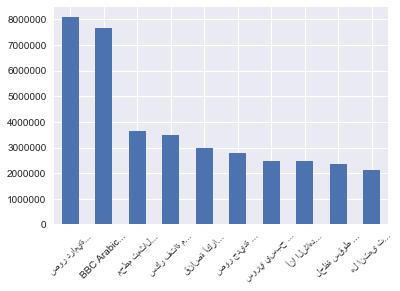

In [30]:
visualize_most(DF, 'viewCount')

1 )  سوري يسبح من تركيا إلى اليونان - أنا الشاهد
2 )  سكر فتاة مصرية تحلق شعر الرجال
3 )  محطم تمثال صدام حسين نادم على فعلته
4 )  صور درامية للتسونامي الذي ضرب اليابان
5 )  كاميرا بي بي سي تحلق فوق الموصل - فيديو بتقنية 360 درجة
6 )  أنا الشاهد: هل يمكن لبطل رفع أثقال أن يأكل "ساندويتش شاورما" بطول مترين
7 )  بي_بي_سي_ترندينغ | #محمد_صلاح يحقق أمنية طفل انجليزي كتب له أغنية
8 )  الفيلم الوثائقي: حصار مكة
9 )  بي بي سي ترافق قناصة الرد السريع إلى الموصل القديمة
10 )  بي_بي_سي_ترندينغ: كيف سخر المصريون من أوتوبيس المنتخب الوطني؟ #مصر #المونديال


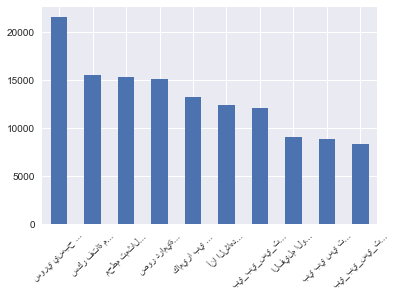

In [31]:
visualize_most(DF, 'likeCount')

1 )  الحراك السري في السعودية -  فيلم وثائقي
2 )  وثائقي بي بي سي "أمراء آل سعود المخطوفون"
3 )  إمام أمريكي مثلي يزوج المسلمين المثليين
4 )  صور درامية للتسونامي الذي ضرب اليابان
5 )  هل انتهى تنظيم  الدولة الإسلامية فعلا ؟
6 )  لحظة سقوط الرئيس اللبناني ميشال عون أرضا في القمة العربية
7 )  الفيلم الوثائقي: الحوثيون من الجبل إلى السلطة
8 )  الفيلم الوثائقي: حصار مكة
9 )  سكر فتاة مصرية تحلق شعر الرجال
10 )  أنا الشاهد: هل يمكن لبطل رفع أثقال أن يأكل "ساندويتش شاورما" بطول مترين


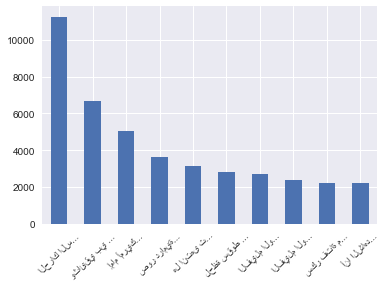

In [32]:
visualize_most(DF, 'dislikeCount')

1 )  هل انتهى تنظيم  الدولة الإسلامية فعلا ؟
2 )  إمام أمريكي مثلي يزوج المسلمين المثليين
3 )  لحظة سقوط الرئيس اللبناني ميشال عون أرضا في القمة العربية
4 )  محطم تمثال صدام حسين نادم على فعلته
5 )  وثائقي بي بي سي "أمراء آل سعود المخطوفون"
6 )  الفيلم الوثائقي: جنود إسرائيل العرب
7 )  بي_بي_سي_ترندينغ: إمام مسجد أردني يصلي التراويح وحده بعد مغادرة المصلين في منتصف الصلاة #الأردن
8 )  بي_بي_سي_ترندينغ | غضب في #السودان من مسلسل "بلوك غشمرة" الكويتي  #الكويت
9 )  الفيلم الوثائقي: حصار مكة
10 )  شيخ مشايخ قبيلة شمر حميدي دهام الجربا - بلا قيود


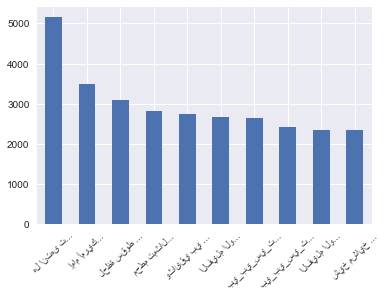

In [33]:
visualize_most(DF, 'commentCount')

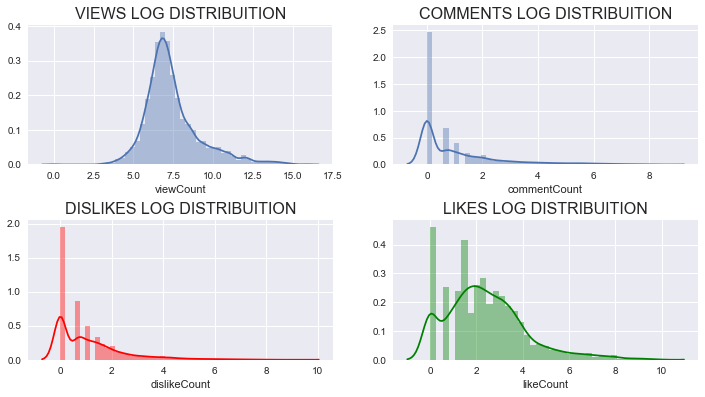

In [34]:
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(np.log(DF['viewCount'] + 1))
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(np.log(DF['likeCount'] + 1),color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(np.log(DF['dislikeCount'] + 1), color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(np.log(DF['commentCount'] + 1))
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [35]:
def visualize_(col, name):
    plt.figure(figsize = (14,9))

    plt.subplot(211)
    g = sns.countplot(col, data=DF, palette="Set1")
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g.set_title("Counting Publish On " + name, fontsize=20)
    g.set_xlabel(name, fontsize=15)
    g.set_ylabel("Count", fontsize=15)
    plt.show()

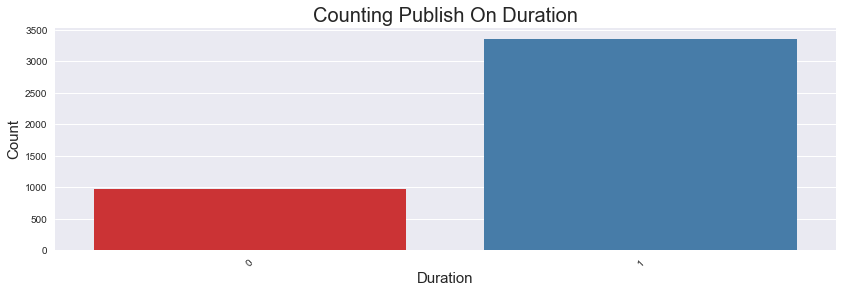

In [36]:
visualize_('publish_duration', 'Duration')

In [37]:
publish_durationCnt = DF['publish_duration'].value_counts()

In [38]:
PMview = DF[DF['publish_duration'] == 1]['viewCount'].sum()

In [39]:
AMview = DF[DF['publish_duration'] == 0]['viewCount'].sum()

In [40]:
PMview / publish_durationCnt[1]

30607.26531826294

In [41]:
PMview / publish_durationCnt[0]

105540.12923076923

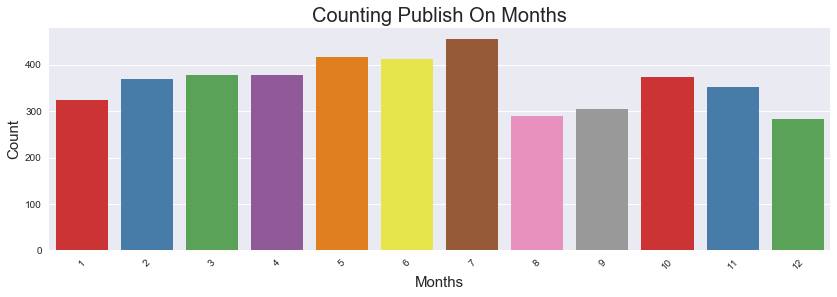

In [42]:
visualize_('publish_month', 'Months')

In [43]:
months = []
for i in range(1, 13):
    months.append(DF[DF['publish_month'] == i]['viewCount'].sum())

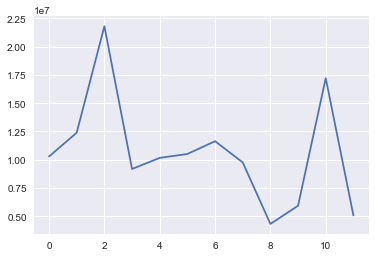

In [44]:
plt.plot(months)

In [45]:
MonthsDF = pd.DataFrame(months, columns=['views'])
MonthsDF['Days'] = list(range(1,13))
MonthsDF.sort_values('views', inplace=True, ascending=False)
MonthsDF

,views,Days
2,21802566,3
10,17213622,11
1,12394119,2
6,11639803,7
5,10509202,6
0,10289295,1
4,10165289,5
7,9764053,8
3,9184531,4
9,5935839,10


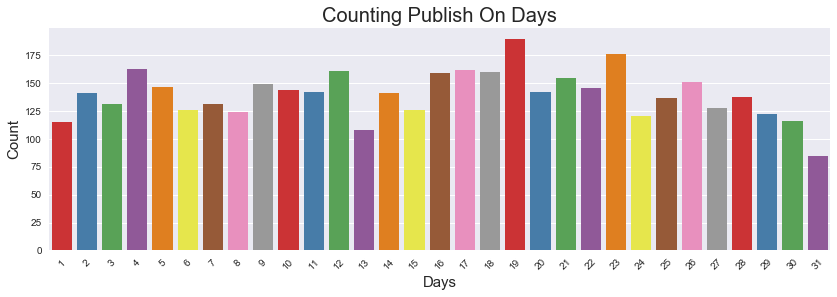

In [46]:
visualize_('publish_day', 'Days')

In [47]:
days = []
for i in range(1, 32):
    days.append(DF[DF['publish_day'] == i]['viewCount'].sum())

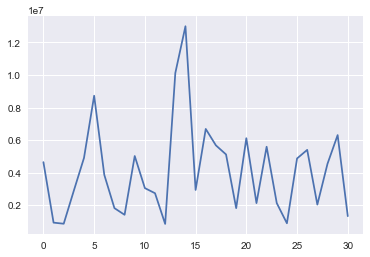

In [48]:
plt.plot(days)

In [49]:
DaysDF = pd.DataFrame(days, columns=['views'])
DaysDF['Days'] = list(range(1,32))
DaysDF.sort_values('views', inplace=True, ascending=False)
DaysDF

,views,Days
14,12997231,15
13,10119756,14
5,8725385,6
16,6683349,17
29,6305460,30
20,6113746,21
17,5674287,18
22,5589487,23
26,5396505,27
18,5116092,19


In [50]:
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

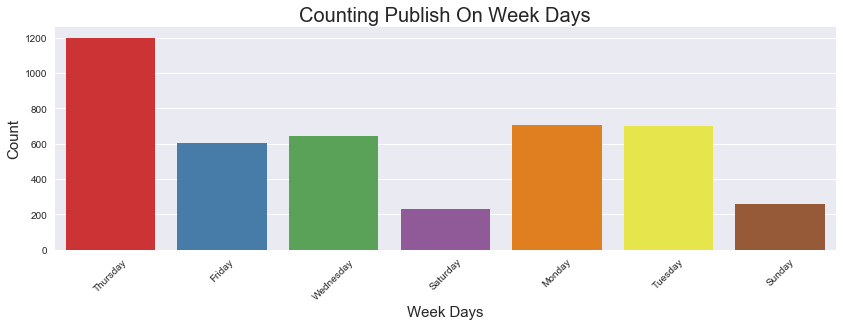

In [51]:
visualize_('publish_week_day', 'Week Days')

In [52]:
days_of_week = []
for i in week_days:
    days_of_week.append(DF[DF['publish_week_day'] == i]['viewCount'].sum())

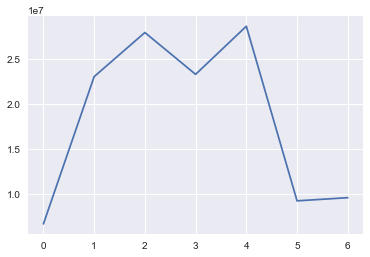

In [53]:
plt.plot(days_of_week)

In [54]:
weekDaysDF = pd.DataFrame(days_of_week, columns=['views'])
weekDaysDF['week_days'] = week_days
weekDaysDF.sort_values('views', inplace=True, ascending=False)
weekDaysDF

,views,week_days
4,28651778,Thursday
2,27950188,Tuesday
3,23291546,Wednesday
1,23036696,Monday
6,9549683,Saturday
5,9196169,Friday
0,6625529,Sunday


In [55]:
definitionCnt = DF['definition'].value_counts()

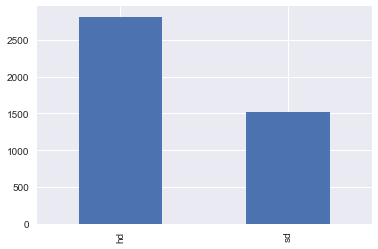

In [56]:
definitionCnt.plot.bar()

In [57]:
hdViews = DF[DF['definition'] == 'hd']['viewCount'].sum()

In [58]:
sdViews = DF[DF['definition'] == 'sd']['viewCount'].sum()

In [59]:
hdViews / definitionCnt['hd']

21700.954174067494

In [60]:
sdViews / definitionCnt['sd']

44161.237187910643

In [61]:
 DF['defaultLanguage'].fillna('nan', inplace=True)

In [62]:
defaultLanguageCnt = DF['defaultLanguage'].value_counts()
defaultLanguageCnt

nan    2552
ar     1785
Name: defaultLanguage, dtype: int64

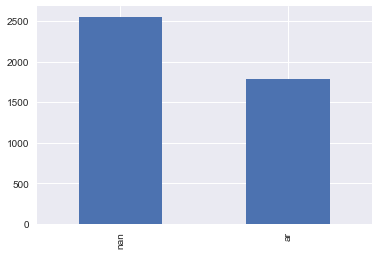

In [63]:
defaultLanguageCnt.plot.bar()

In [64]:
arViews = DF[DF['defaultLanguage'] == 'ar']['viewCount'].sum()

In [65]:
nanViews = DF[DF['defaultLanguage'] == 'nan']['viewCount'].sum()

In [66]:
arViews / defaultLanguageCnt['ar']

26209.597759103643

In [67]:
nanViews / defaultLanguageCnt['nan']

31942.577194357367